# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

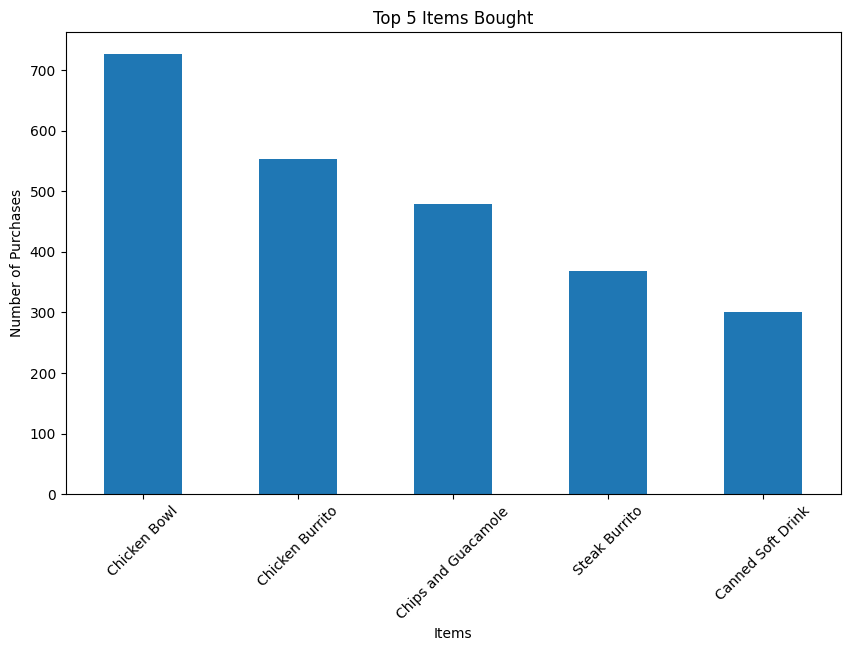

Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barbacoa Salad Bowl

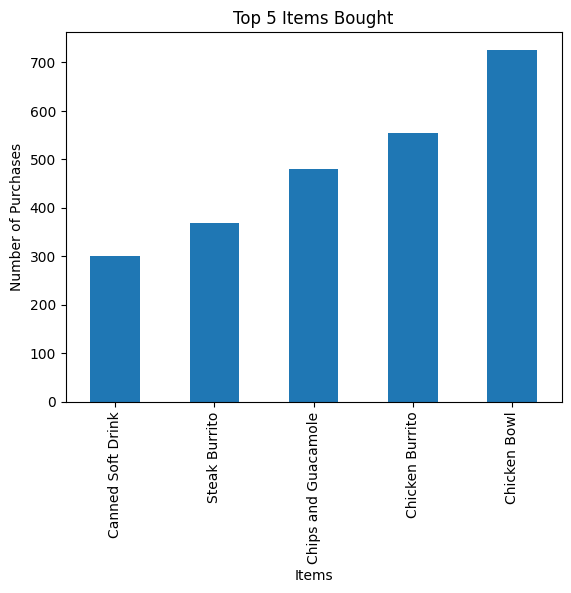

In [12]:
# Identificar los 5 artículos más comprados
top_items = chipo['item_name'].value_counts().head(5)

# Crear el histograma
plt.figure(figsize=(10, 6)) #Tamaño del gráfico
top_items.plot(kind='bar') #Gráfico de barras(histograma)
plt.title('Top 5 Items Bought') #Título del gráfico
plt.xlabel('Items') #Nombre del eje x
plt.ylabel('Number of Purchases') #Nombre del eje y
plt.xticks(rotation=45) #Rotación de los nombres de los items
plt.show() #Mostrar el gráfico

# Convirtiendo primero en un diccionario

# Obtenemos la serie(columna) de los items

x=chipo['item_name']

# Usamos Counter para crear un diccionario con los items y la cantidad de veces que aparecen

letter_counts = Counter(x)

print (letter_counts)

# Convertimos el diccionario en un DataFrame

df= pd.DataFrame.from_dict(letter_counts, orient='index') #Orient='index' para que las keys sean los índices

# Ordenamos de menor a moayor y obtenemos los 5 últimos

df = df[0].sort_values(ascending = True).tail(5)

# Creamos el histograma
df.plot(kind='bar') #Gráfico de barras(histograma)

plt.title('Top 5 Items Bought') #Título del gráfico
plt.xlabel('Items') #Nombre del eje x
plt.ylabel('Number of Purchases') #Nombre del eje y

plt.show() #Mostrar el gráfico

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  total_price  
0                                                NaN       0.39         0.39  
1                                       [Clementine]       0.39         0.39  
2                                            [Apple]       0.39         0.39  
3                                                NaN       0.39         0.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       0.98         1.96  


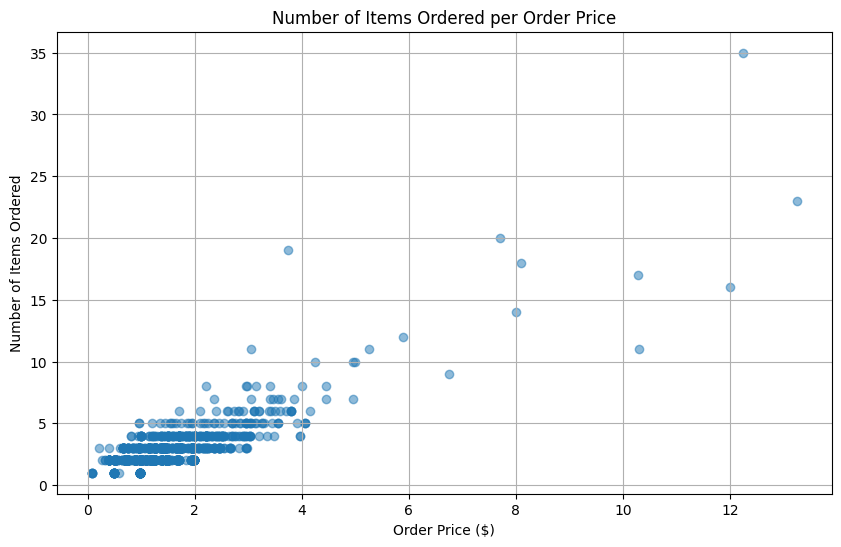

In [45]:
# Asegúrate de que todos los valores en la columna 'item_price' sean cadenas
chipo['item_price'] = chipo['item_price'].astype(str)
print(chipo.head())
# Convertir la columna 'item_price' a tipo float eliminando el signo de dólar
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$', '')))

# Calcular el precio total por cada fila (cantidad * precio unitario)
chipo['total_price'] = chipo['quantity'] * chipo['item_price']

# Calcular el precio total por pedido y el número total de artículos por pedido
order_totals = chipo.groupby('order_id').agg({'total_price': 'sum', 'quantity': 'sum'}).reset_index()

# Crear el scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(order_totals['total_price'], order_totals['quantity'], alpha=0.5)
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

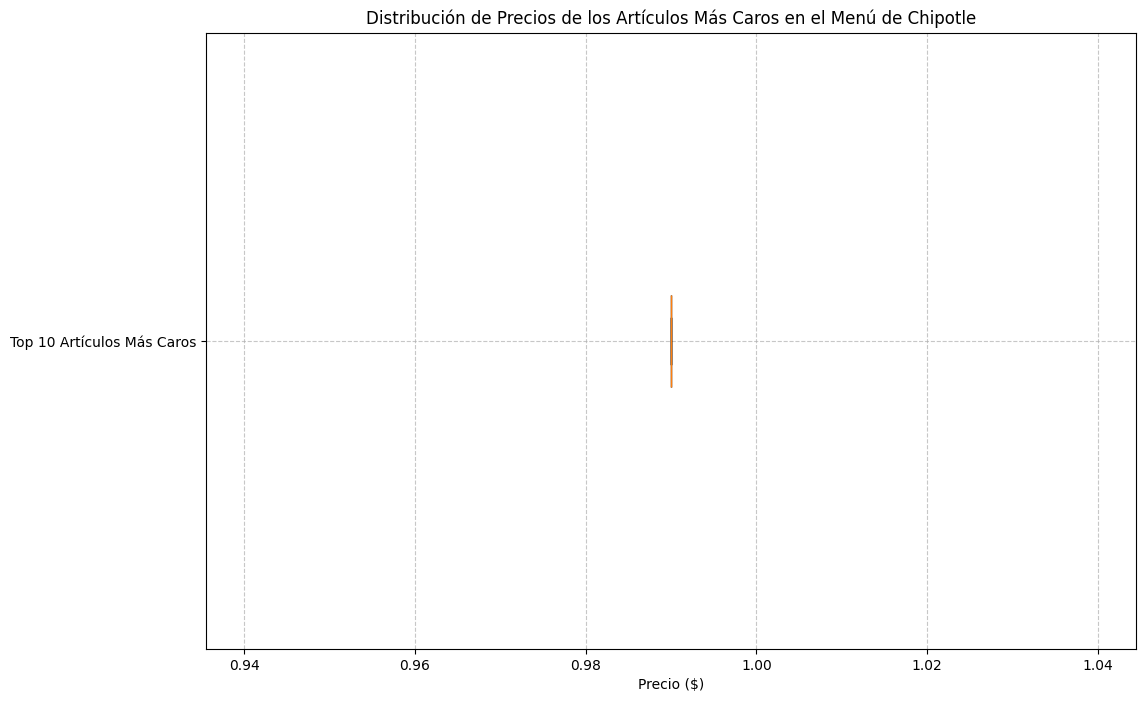